In [0]:
!ls

sample_data


In [0]:
!wget http://images.cocodataset.org/zips/train2017.zip

--2019-10-26 09:33:04--  http://images.cocodataset.org/zips/train2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.146.83
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.146.83|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19336861798 (18G) [application/zip]
Saving to: ‘train2017.zip’

train2017.zip       100%[===================>]  18.01G  16.4MB/s    in 18m 55s 

2019-10-26 09:51:59 (16.2 MB/s) - ‘train2017.zip’ saved [19336861798/19336861798]



In [0]:
!wget http://images.cocodataset.org/zips/val2017.zip

--2019-10-26 09:52:00--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.27.68
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.27.68|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘val2017.zip’

val2017.zip         100%[===================>] 777.80M  16.9MB/s    in 49s     

2019-10-26 09:52:50 (15.9 MB/s) - ‘val2017.zip’ saved [815585330/815585330]



In [0]:
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip

--2019-10-26 09:52:52--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.39.100
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.39.100|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  16.5MB/s    in 16s     

2019-10-26 09:53:08 (15.2 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]



In [0]:
!wget http://images.cocodataset.org/annotations/stuff_annotations_trainval2017.zip

--2019-10-26 09:53:10--  http://images.cocodataset.org/annotations/stuff_annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.237.195
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.237.195|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1148688564 (1.1G) [application/zip]
Saving to: ‘stuff_annotations_trainval2017.zip’

stuff_annotations_t 100%[===================>]   1.07G  17.0MB/s    in 68s     

2019-10-26 09:54:18 (16.1 MB/s) - ‘stuff_annotations_trainval2017.zip’ saved [1148688564/1148688564]



In [0]:
%%capture
!unzip stuff_annotations_trainval2017.zip

In [0]:
%%capture
!unzip annotations_trainval2017.zip

In [0]:
%%capture
!unzip train2017.zip

In [0]:
%%capture
!unzip val2017.zip

In [0]:
!pip install gluoncv

     |████████████████████████████████| 512kB 2.7MB/s 


In [0]:
!pip install mxnet

     |████████████████████████████████| 25.4MB 43.5MB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [0]:
!ls

annotations		      stuff_annotations_trainval2017.zip  val2017
annotations_trainval2017.zip  train2017				  val2017.zip
sample_data		      train2017.zip


In [0]:
from gluoncv import data, utils
from matplotlib import pyplot as plt

train_dataset = data.COCODetection('.',splits=['instances_train2017'])
val_dataset = data.COCODetection('.',splits=['instances_val2017'])
print('Num of training images:', len(train_dataset))
print('Num of validation images:', len(val_dataset))

loading annotations into memory...
Done (t=20.32s)
creating index...
index created!
loading annotations into memory...
Done (t=0.59s)
creating index...
index created!
Num of training images: 117266
Num of validation images: 4952


In [0]:
print(len(train_dataset))

117266


(2, 5)
Image size (height, width, RGB): (640, 480, 3)
Num of objects: 2
Bounding boxes (num_boxes, x_min, y_min, x_max, y_max):
 [[314.68 552.44 450.78 639.  ]
 [  1.12 370.34 118.05 566.2 ]]
Class IDs (num_boxes, ):
 [[61.]
 [71.]]


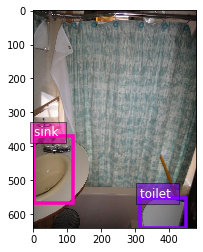

In [0]:
train_image, train_label = train_dataset[37572]
bounding_boxes = train_label[:, :4]
class_ids = train_label[:, 4:5]
print(train_label.shape)
print('Image size (height, width, RGB):', train_image.shape)
print('Num of objects:', bounding_boxes.shape[0])
print('Bounding boxes (num_boxes, x_min, y_min, x_max, y_max):\n',
      bounding_boxes)
print('Class IDs (num_boxes, ):\n', class_ids)

utils.viz.plot_bbox(train_image.asnumpy(), bounding_boxes, scores=None,
                    labels=class_ids, class_names=train_dataset.classes)
plt.show()

In [0]:
print(len(train_dataset))

117266


In [0]:
#OpenCV demo

def imShowCv(image):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  
  
  

(1, 5)
[[  0.96 228.08 316.61 418.99]]
[[2.]]
<class 'numpy.ndarray'>


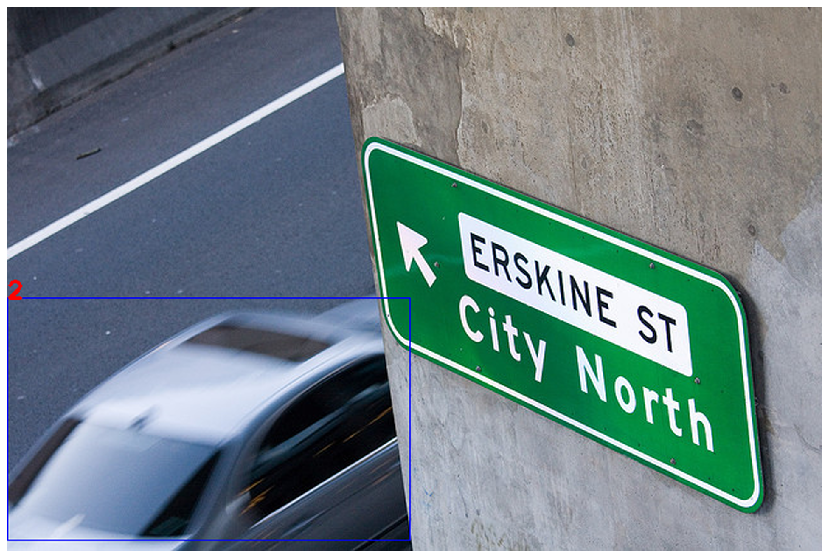

In [0]:
import cv2
import numpy as np


train_image, train_label = train_dataset[97552]
bounding_boxes = train_label[:, :4]
class_ids = train_label[:, 4:5]
print(train_label.shape)



print(bounding_boxes)
print(class_ids)

train_image = train_image.asnumpy()
print(type(train_image))
train_image = cv2.cvtColor(train_image, cv2.COLOR_BGR2RGB)


for i in range(len(class_ids)):
  
  class_id = str(int(class_ids[i][0]))
  bbox = bounding_boxes[i]
  
  x1 = int(bbox[0])
  y1 = int(bbox[1])
  x2 = int(bbox[2])
  y2 = int(bbox[3])
  
  
  cv2.rectangle(train_image, (x1, y1), (x2, y2), (255, 0, 0), 1)
  cv2.putText(train_image,class_id, (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, .6,(0, 0, 255),2)
  
  




imShowCv(train_image)


In [0]:
def yolo_format(class_index, point_1, point_2, width, height):
    # YOLO wants everything normalized
    # Order: class x_center y_center x_width y_height
    x_center = (point_1[0] + point_2[0]) / float(2.0 * width)
    y_center = (point_1[1] + point_2[1]) / float(2.0 * height)
    x_width = float(abs(point_2[0] - point_1[0])) / width
    y_height = float(abs(point_2[1] - point_1[1])) / height
    return str(class_index) + " " + str(x_center) \
       + " " + str(y_center) + " " + str(x_width) + " " + str(y_height)
  
def save_bb(txt_path, line):
    with open(txt_path, 'a') as myfile:
        myfile.write(line + "\n") # append line

In [0]:
!ls

annotations		      stuff_annotations_trainval2017.zip  val2017
annotations_trainval2017.zip  train2017				  val2017.zip
sample_data		      train2017.zip


In [0]:
!mkdir bbox_txt
!mkdir images

In [0]:
import cv2
import os

n=0
imgFolder = 'images'
txtFolder = 'bbox_txt'

#id of your class in training of the YOLOv3 model
label_class_id = 0



for i in range(len(train_dataset)):
  
  if i % 500 == 0:
    print(i)
    print('images of interest',n)
  
  train_image, train_label = train_dataset[i]
  bounding_boxes = train_label[:, :4]
  class_ids = train_label[:, 4:5]
  
  
  
  if 51 in class_ids:
    
    name = 'carrot_'+str(n)
    txtPath = os.path.join(txtFolder, name)+'.txt'
    imgPath = os.path.join(imgFolder, name) +'.jpg'
    #print(txtPath, imgPath)
    
    
    
    
    #utils.viz.plot_bbox(train_image.asnumpy(), bounding_boxes, scores=None,
                    #labels=class_ids, class_names=train_dataset.classes)
    
    
    image = train_image.asnumpy()
    height, width = image.shape[:2]
    
    #print(bounding_boxes)
    #print(class_ids)
    
    
    for j in range(len(class_ids)):
      
      if class_ids[j]==51:
        
        
        x1 = int(bounding_boxes[j][0])
        y1 = int(bounding_boxes[j][1])
        x2 = int(bounding_boxes[j][2])
        y2 = int(bounding_boxes[j][3])
        
        
        
        line = yolo_format(label_class_id,(x1,y1),(x2,y2),width, height)
        save_bb(txtPath, line)
        
        
    n+=1
    
        
        #cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (255,0,0), 2)
    
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    cv2.imwrite(imgPath,image)
    
    #plt.show()
      
print(n)

0
images of interest 0
500
images of interest 5
1000
images of interest 10
1500
images of interest 20
2000
images of interest 23
2500
images of interest 28
3000
images of interest 31
3500
images of interest 41
4000
images of interest 50
4500
images of interest 66
5000
images of interest 75
5500
images of interest 85
6000
images of interest 90
6500
images of interest 96
7000
images of interest 102
7500
images of interest 108
8000
images of interest 117
8500
images of interest 121


KeyboardInterrupt: ignored

In [0]:
!zip -r label.zip bbox_txt images

  adding: bbox_txt/ (stored 0%)
  adding: bbox_txt/carrot_96.txt (deflated 23%)
  adding: bbox_txt/carrot_32.txt (deflated 40%)
  adding: bbox_txt/carrot_105.txt (deflated 16%)
  adding: bbox_txt/carrot_58.txt (deflated 64%)
  adding: bbox_txt/carrot_17.txt (deflated 63%)
  adding: bbox_txt/carrot_25.txt (deflated 59%)
  adding: bbox_txt/carrot_2.txt (deflated 61%)
  adding: bbox_txt/carrot_48.txt (deflated 47%)
  adding: bbox_txt/carrot_110.txt (deflated 41%)
  adding: bbox_txt/carrot_62.txt (deflated 16%)
  adding: bbox_txt/carrot_5.txt (deflated 21%)
  adding: bbox_txt/carrot_107.txt (deflated 53%)
  adding: bbox_txt/carrot_36.txt (deflated 51%)
  adding: bbox_txt/carrot_117.txt (deflated 58%)
  adding: bbox_txt/carrot_55.txt (deflated 58%)
  adding: bbox_txt/carrot_49.txt (deflated 59%)
  adding: bbox_txt/carrot_85.txt (deflated 48%)
  adding: bbox_txt/carrot_100.txt (deflated 42%)
  adding: bbox_txt/carrot_99.txt (deflated 66%)
  adding: bbox_txt/carrot_80.txt (deflated 33%)
  add

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
print(len(os.listdir('images')))
print(len(os.listdir('bbox_txt')))

3953
3953
